In [64]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.stats import ttest_ind

# Load Dataset

In [65]:
df=pd.read_csv(r'marketing_campaign.xls', sep='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Preprocessing

In [67]:
#Convert data type to datetime
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])

In [68]:
#Missing value check
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

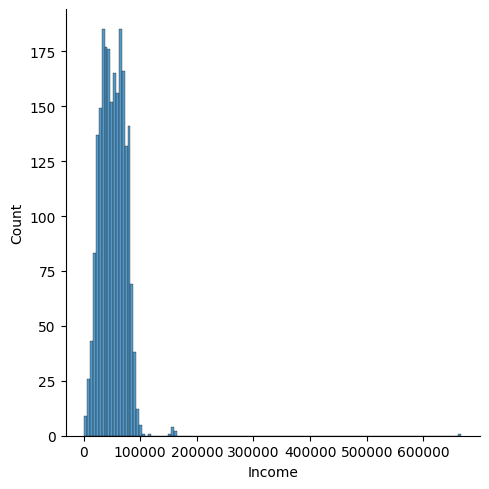

In [69]:
# Income column distribution

sns.displot(x=df['Income'])

In [70]:
#Handling missing value and duplicate check
df['Income'].fillna(df['Income'].median(),inplace=True)
df.duplicated().sum()

0

In [71]:
#Descriptive Statistics
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


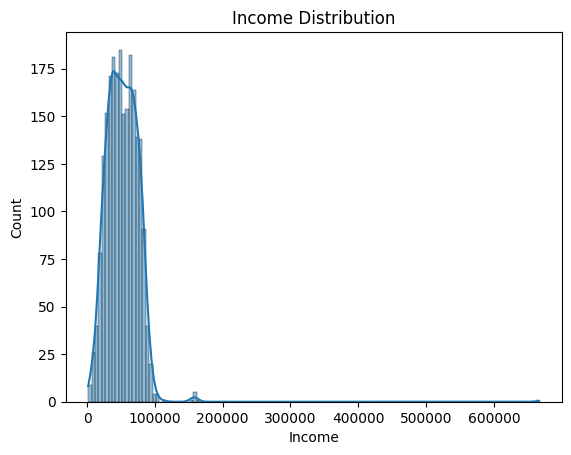

In [72]:
# EDA
# Distribusi Income
sns.histplot(df['Income'], kde=True)
plt.title('Income Distribution')
plt.show()

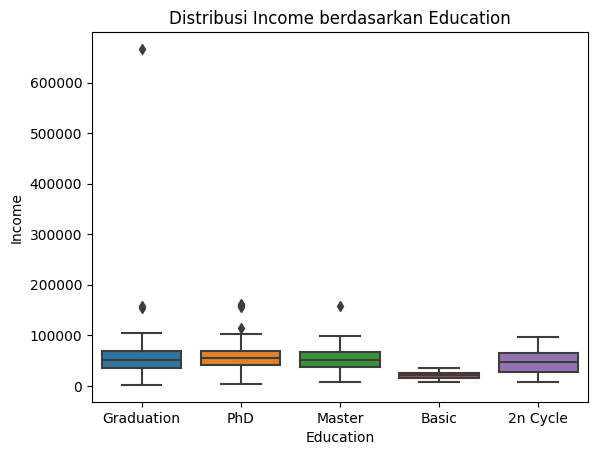

In [73]:
#education and income Distribution 

sns.boxplot(x='Education', y='Income', data=df)
plt.title('Distribusi Income berdasarkan Education')
plt.show()

In [74]:
#Outlier Check
Outlier={}
q1=df['Income'].quantile(0.25)
q3=df['Income'].quantile(0.75)
IQR=q3-q1

#Batas outlier
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR
Outlier=df[(df['Income']<lower_bound)|(df['Income']>upper_bound)]
Outlier

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
164,8475,1973,PhD,Married,157243.0,0,1,2014-01-03,98,20,...,0,0,0,0,0,0,0,3,11,0
617,1503,1976,PhD,Together,162397.0,1,1,2013-03-06,31,85,...,1,0,0,0,0,0,0,3,11,0
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-07-02,81,1,...,0,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803.0,0,0,2012-04-08,21,55,...,0,0,0,0,0,0,0,3,11,0
1300,5336,1971,Master,Together,157733.0,1,0,2013-04-06,37,39,...,1,0,0,0,0,0,0,3,11,0
1653,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,...,1,0,0,0,0,0,0,3,11,0
2132,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,0,0,0,0,0,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-02-06,23,9,...,6,0,0,0,0,0,0,3,11,0


In [75]:
df_noOutlier=df[(df['Income']>=lower_bound)&(df['Income']<=upper_bound)]

In [76]:
#Encoding data dengan Label Encoding
le=preprocessing.LabelEncoder()
le.fit(df_noOutlier['Education'])
df_noOutlier['Education_encoded']=le.fit_transform(df_noOutlier['Education'])
df_noOutlier['Education_encoded'].unique()

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_53480/2972848800.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noOutlier['Education_encoded']=le.fit_transform(df_noOutlier['Education'])


array([2, 4, 3, 1, 0])

# Analisis One Way Anova

In [77]:
group_data=[df_noOutlier['Income'][df_noOutlier['Education_encoded']==group]for group in df_noOutlier['Education_encoded'].unique()]

In [78]:
#Uji ANOVA
f_stat, p_value=stats.f_oneway(*group_data)
print(f'F-statistic: {f_stat}, P-Value: {p_value}')

if p_value <= 0.05:
    print('Tolak hipotesis 0')
    print('Ada pengaruh signifikan antara tingkat pendidikan income')
else:
    print('Gagal menolak Hipotesis 0')
    print('Tidak ada pengaruh signifikan antara tingkat pendidikan dan income')


F-statistic: 39.62113614704851, P-Value: 4.264238088173374e-32
Tolak hipotesis 0
Ada pengaruh signifikan antara tingkat pendidikan income


# T-Test

In [79]:
#Uji T-test
income_graduation=df_noOutlier[df_noOutlier['Education']=='Graduation']['Income']
income_phd=df_noOutlier[df_noOutlier['Education']=='PhD']['Income']

t_stat, p_value=ttest_ind(income_graduation,income_phd)
print(f'T-stats: {t_stat}, P-value: {p_value}')

if p_value <= 0.05:
    print('Tolak Hipotesisi 0')
    print('Ada pengaruh signifikan antara graduation income dan pHD')
else:
    print('Gagal menolak Hipotesis 0')
    print('Tidak ada pengaruh signifikan antara graduation income dan pHD income')

T-stats: -2.9810830341691563, P-value: 0.0029155669053975547
Tolak Hipotesisi 0
Ada pengaruh signifikan antara graduation income dan pHD


# Interpretasi
- Pada uji ANOVA, Hasil ini menunjukkan ada perbedaan signifikan dalam pendapatan(Income) berdasarkan tingkat pendidikan (Education). Maka tingkat pendidikan berpengaruh signifikan terhadap pendapatan
- Pada uji T-test kita menolak hipotesis 0 ini menunjukkan ada perbedaan signifikan dalam pendapatan antara orang yang berpendidikan graduation dan pendidikan pHD